In [1]:
# load the autoreload extension for IPython
# This allows you to automatically reload modules before executing code
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the system path
sys.path.append(os.path.abspath(os.path.join('..')))

## EDA for CBE APP Reviews

In [2]:
# Import necessary modules and packages
from scripts.utils import AppName
from scripts.sentiment_analysis import SentimentAnalysis, SentimentMethod
import pandas as pd

d:\active_repos\10_academy\week-2-Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load the review data
review_data = pd.read_csv('../Data/cleaned/cbe_reviews_cleaned.csv')

#show the first few rows of the review data
review_data.head(5)


,review,rating,date,bank,source
0,v.good app,4,2025-06-09,cbe,Google Play Store
1,very good app,1,2025-06-09,cbe,Google Play Store
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store
3,Best,5,2025-06-08,cbe,Google Play Store
4,20 years,5,2025-06-08,cbe,Google Play Store


In [4]:
# create an instance of the SentimentAnalysis class
analysis = SentimentAnalysis(review_data, AppName.CBE)

Checking for NLTK resources...
NLTK resources not found. Downloading...
NLTK resources downloaded.


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
d:\active_repos\10_academy\week-2-Customer-Experience-Analytics-for-Fintech-Apps\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\wubsh\.cache\huggingface\hub\models--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pyth

In [5]:
# Preprocess review text
analysis.preprocess_reviews()
review_data.head(5)

Preprocessing reviews...
Reviews preprocessed. Tokens extracted.


,review,rating,date,bank,source,processed_review
0,v.good app,4,2025-06-09,cbe,Google Play Store,app
1,very good app,1,2025-06-09,cbe,Google Play Store,good app
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying
3,Best,5,2025-06-08,cbe,Google Play Store,best
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year


In [6]:
# Sentiment analysis using Bert
analysis.compute_sentiment(method=SentimentMethod.BERT)
review_data.head(5)

Computing DistilBERT sentiment scores...
DistilBERT sentiment scores computed.
Sentiment results saved to ..\Data\gold\cbe_reviews_gold.csv


,review,rating,date,bank,source,processed_review,bert_sentiment,bert_score
0,v.good app,4,2025-06-09,cbe,Google Play Store,app,positive,0.968457
1,very good app,1,2025-06-09,cbe,Google Play Store,good app,positive,0.999849
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying,positive,0.999863
3,Best,5,2025-06-08,cbe,Google Play Store,best,positive,0.999794
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year,positive,0.995838


In [7]:
# Sentiment analysis using VADER
analysis.compute_sentiment(method=SentimentMethod.VADER)
review_data.head(5)

Computing VADER sentiment scores...
VADER sentiment scores computed.
Sentiment results saved to ..\Data\gold\cbe_reviews_gold.csv


,review,rating,date,bank,source,processed_review,bert_sentiment,bert_score,vader_score,vader_sentiment
0,v.good app,4,2025-06-09,cbe,Google Play Store,app,positive,0.968457,0.0000,neutral
1,very good app,1,2025-06-09,cbe,Google Play Store,good app,positive,0.999849,0.4404,positive
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying,positive,0.999863,0.8020,positive
3,Best,5,2025-06-08,cbe,Google Play Store,best,positive,0.999794,0.6369,positive
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year,positive,0.995838,0.0000,neutral


In [8]:
# Sentiment analysis using Text Blob

analysis.compute_sentiment(method=SentimentMethod.TEXT_BLOB)
review_data.head(5)

Computing TextBlob sentiment scores...
TextBlob sentiment scores computed.
Sentiment results saved to ..\Data\gold\cbe_reviews_gold.csv


,review,rating,date,bank,source,processed_review,bert_sentiment,bert_score,vader_score,vader_sentiment,textblob_score,textblob_sentiment
0,v.good app,4,2025-06-09,cbe,Google Play Store,app,positive,0.968457,0.0000,neutral,0.00,neutral
1,very good app,1,2025-06-09,cbe,Google Play Store,good app,positive,0.999849,0.4404,positive,0.70,positive
2,Very amazing app indeed. I'm enjoying it,5,2025-06-08,cbe,Google Play Store,amazing app indeed enjoying,positive,0.999863,0.8020,positive,0.55,positive
3,Best,5,2025-06-08,cbe,Google Play Store,best,positive,0.999794,0.6369,positive,1.00,positive
4,20 years,5,2025-06-08,cbe,Google Play Store,20 year,positive,0.995838,0.0000,neutral,0.00,neutral


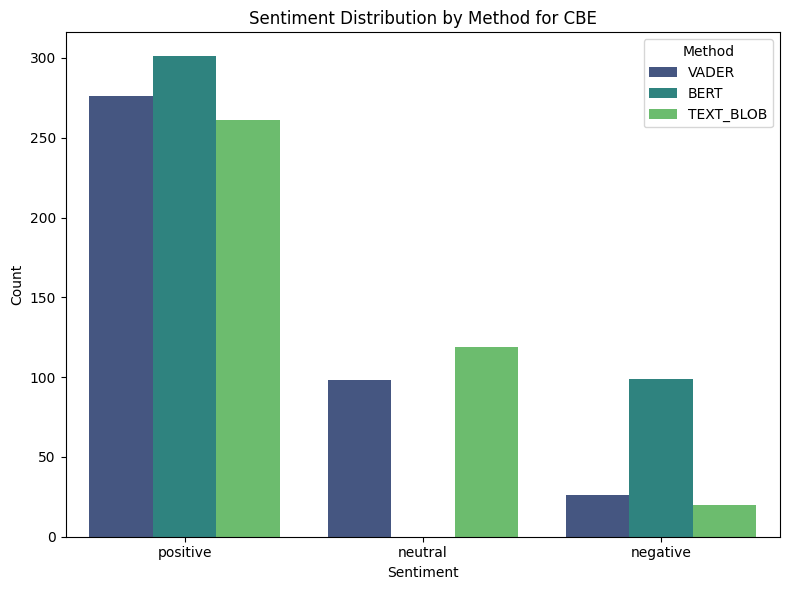

In [9]:
# Visualize sentiment distribution for all sentiment algorithms
analysis.plot_sentiment_distribution()

Top 20 keywords in positive reviews (bert):
[('app', 91), ('good app', 21), ('this app', 15), ('application', 9), ('banking', 7), ('great app', 6), ('bank', 5), ('the app', 5), ('very good app', 4), ('time', 4), ('life', 4), ('update', 4), ('nice app', 4), ('screenshot', 4), ('issue', 3), ('service', 3), ('network', 3), ('good job', 3), ('job', 3), ('the good app', 3)]

Top 20 keywords in negative reviews (bert):
[('app', 37), ('bank', 11), ('banking', 9), ('the app', 8), ('account', 7), ('this app', 7), ('problem', 6), ('screenshot', 6), ('developer', 6), ('transaction', 5), ('system', 5), ('service', 5), ('application', 5), ('security', 4), ('money', 4), ('network', 4), ('time', 4), ('option', 4), ('thing', 4), ('transfer', 3)]


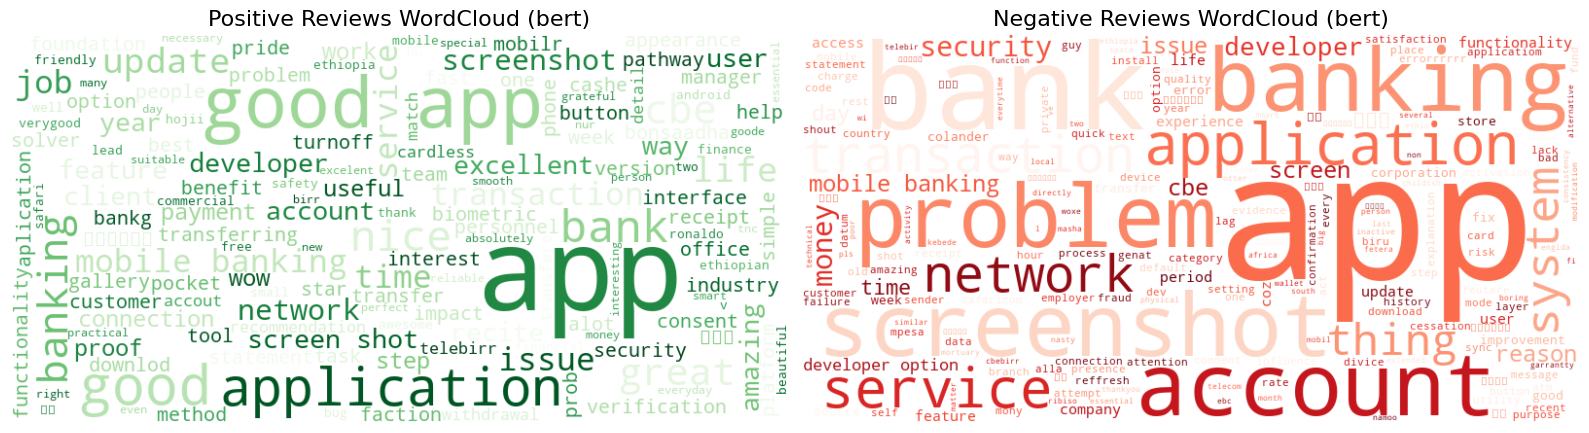

{'positive': [('app', 91),
  ('good app', 21),
  ('this app', 15),
  ('application', 9),
  ('banking', 7),
  ('great app', 6),
  ('bank', 5),
  ('the app', 5),
  ('very good app', 4),
  ('time', 4),
  ('life', 4),
  ('update', 4),
  ('nice app', 4),
  ('screenshot', 4),
  ('issue', 3),
  ('service', 3),
  ('network', 3),
  ('good job', 3),
  ('job', 3),
  ('the good app', 3)],
 'negative': [('app', 37),
  ('bank', 11),
  ('banking', 9),
  ('the app', 8),
  ('account', 7),
  ('this app', 7),
  ('problem', 6),
  ('screenshot', 6),
  ('developer', 6),
  ('transaction', 5),
  ('system', 5),
  ('service', 5),
  ('application', 5),
  ('security', 4),
  ('money', 4),
  ('network', 4),
  ('time', 4),
  ('option', 4),
  ('thing', 4),
  ('transfer', 3)]}

In [13]:
## Extract Keywords from positive and negative reviews
analysis.keyword_extraction(top_n=20, method=SentimentMethod.BERT)

In [14]:
# Extract themes from the reviews using BERT
analysis.extract_themes(method=SentimentMethod.BERT)


Top 30 keywords in positive reviews (bert):
[('app', 91), ('good app', 21), ('this app', 15), ('application', 9), ('banking', 7), ('great app', 6), ('bank', 5), ('the app', 5), ('very good app', 4), ('time', 4), ('life', 4), ('update', 4), ('nice app', 4), ('screenshot', 4), ('issue', 3), ('service', 3), ('network', 3), ('good job', 3), ('job', 3), ('the good app', 3), ('transaction', 3), ('year', 2), ('connection', 2), ('some issue', 2), ('client', 2), ('developer', 2), ('user', 2), ('very useful app', 2), ('account', 2), ('mobile banking', 2)]

Top 30 keywords in negative reviews (bert):
[('app', 37), ('bank', 11), ('banking', 9), ('the app', 8), ('account', 7), ('this app', 7), ('problem', 6), ('screenshot', 6), ('developer', 6), ('transaction', 5), ('system', 5), ('service', 5), ('application', 5), ('security', 4), ('money', 4), ('network', 4), ('time', 4), ('option', 4), ('thing', 4), ('transfer', 3), ('the screenshot', 3), ('day', 3), ('user', 3), ('issue', 3), ('reason', 3), ('s

{'Account Access Issues': [('account', 2)],
 'Transaction Performance': [('transaction', 2),
  ('transfer', 1),
  ('old transaction', 1)],
 'User Interface & Experience': [('app', 2),
  ('this app', 2),
  ('application', 2),
  ('the app', 2),
  ('good app', 1),
  ('great app', 1),
  ('very good app', 1),
  ('update', 1),
  ('nice app', 1),
  ('the good app', 1),
  ('very useful app', 1)],
 'Customer Support': [('service', 2)],
 'Feature Requests': [('option', 1)],
 'Other': [('banking', 2),
  ('bank', 2),
  ('time', 2),
  ('screenshot', 2),
  ('issue', 2),
  ('network', 2),
  ('developer', 2),
  ('user', 2),
  ('life', 1),
  ('good job', 1),
  ('job', 1),
  ('year', 1),
  ('connection', 1),
  ('some issue', 1),
  ('client', 1)]}

Top 60 keywords in positive reviews (bert):
[('app', 91), ('good app', 21), ('this app', 15), ('application', 9), ('banking', 7), ('great app', 6), ('bank', 5), ('the app', 5), ('very good app', 4), ('time', 4), ('life', 4), ('update', 4), ('nice app', 4), ('screenshot', 4), ('issue', 3), ('service', 3), ('network', 3), ('good job', 3), ('job', 3), ('the good app', 3), ('transaction', 3), ('year', 2), ('connection', 2), ('some issue', 2), ('client', 2), ('developer', 2), ('user', 2), ('very useful app', 2), ('account', 2), ('mobile banking', 2), ('week', 2), ('step', 2), ('its good', 2), ('good', 2), ('work', 2), ('feature', 2), ('screen shot', 2), ('screen', 2), ('shot', 2), ('way', 2), ('my recite', 2), ('recite', 2), ('proof', 2), ('payment', 2), ('v.good app', 1), ('very amazing app', 1), ('20 year', 1), ('a great app', 1), ('a bank', 1), ('your pocket', 1), ('pocket', 1), ('the user interface', 1), ('interface', 1), ('a good connection', 1), ('best mobile banking app', 1), ('the b

d:\active_repos\10_academy\week-2-Customer-Experience-Analytics-for-Fintech-Apps\scripts\sentiment_analysis.py:335: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(sorted_counts), y=list(sorted_themes), palette='viridis')


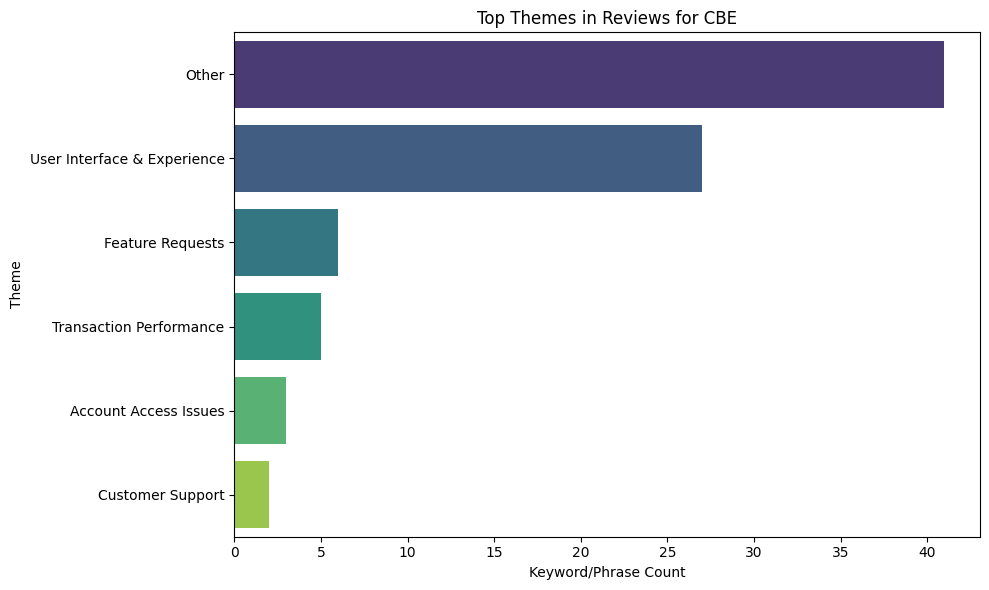

In [15]:
## Visualize the themes
analysis.plot_theme_map(top_n=30, method=SentimentMethod.BERT)